# Data Science And Business Analytics Internship

## The Spark Foundation  : #GRIPAPR21

## Author                : Yogita Anil Mahajan

### Task 1                : Prediction Using Supervised ML

### Problem Statement : Predict The Percentage of a student based on the number of study hours.

### In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.


### What will be predicted score if a student studies for 9.25 hrs/ day?

# ---------------------------------------------------------------------------------------------------------------

### Importing all the Required Libraries

In [1]:
import pandas as pd                # used for reading dataset, manipulating and analyzing data
import numpy as np                 # library that provides a multidimensional array object
import matplotlib.pyplot as plt    # used for visualization of data
%matplotlib inline

### Reading Dataset

In [2]:
# Reading csv data from a link "http://bit.ly/w-data" given by The Spark Foundation

url = "http://bit.ly/w-data"
student_data = pd.read_csv(url)
print("Data imported successfully")

# shape is a property which is used to get a tuple representing the Dimensionality of DataFrame
print("shape of the Dataset is: ",student_data.shape)

Data imported successfully
shape of the Dataset is:  (25, 2)


In [3]:
#Showing Top 10 Records from dataset

student_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### More Information about the dataset

In [4]:
#info() method gives all the information about the dataset like column names, number of records present in each column etc.

student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Check for Null Values if any

In [5]:
# isnull() method check for null values present in the dataset and sum() will returns total number of null values present in
# each column of dataset

student_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

#### There is No Null values present in our dataset

### Statistical summary of dataset

In [6]:
#describe() method is used to display basic statistical information about the dataset like count,mean,min,max,std,percentile etc

student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Data Visualization

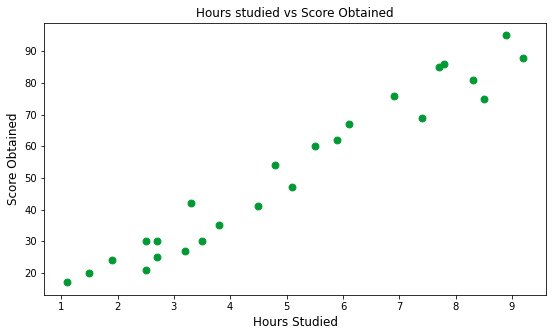

In [7]:
# plotting scatter plot for better understanding of the dataset and to know about the relation between the attributes present 
# in the dataset i.e Relation between Hours studied and Score Obtained

plt.figure(figsize=(9, 5))
plt.xlabel('Hours Studied', fontsize=12)
plt.ylabel('Score Obtained',fontsize=12)
plt.title('Hours studied vs Score Obtained',fontsize=12)
plt.scatter(student_data.Hours,student_data.Scores,color='#009933',marker='o',s=47)
plt.show()

#### From the above Plot we can say that there is Positive Linear Relationship between Hours studied and Score Obtained.


#### As The Number of Hours Studied increases, Score obtained by the Student also Increases

## Data Pre-processing

In [8]:
# Before splitting the dataset into training and testing datasets, our focus must be on finding the dependent and independent 
# variable. for our regression model independent variable is "Hours Studied" and dependent variable is "Score Obtained".

# dividing data into "attributes" (input for model) and "labels" (output from model)

X = student_data.iloc[:, :-1].values  
y = student_data.iloc[:, 1].values  

# X : array of Hours (attributes)

print("Hours:  ",X)

# y : array of Scores (Labels)

print("\nScores:  ",y)


Hours:   [[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]

Scores:   [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


### Splitting Data into Training And Testing Sets

#### sklearn (scikit-learn) is a library in python that provides many unsupervised and supervised learning algorithms.

In [9]:
# train_test_split() method from model_selection module of sklearn splits the dataset into random train and test subsets.this 
# method returns 4 variables X_train, X_test, y_train, y_test.

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0) 

In [10]:
# test_size = 0.2 means we want to keep 20% of data of entire dataset for testing purpose and remaining 80% of data of dataset 
# for Training purpose.

print("length of X_train : ",len(X_train)," length of y_train : ",len(y_train))
print("length of X_test  : ",len(X_test),"  length of y_test : ",len(y_test))


length of X_train :  20  length of y_train :  20
length of X_test  :  5   length of y_test :  5


### Training The Algorithm


In [11]:
# we are going to fit our training dataset into a machine learning model to predict the output

from sklearn.linear_model import LinearRegression 

reg = LinearRegression()     # reg is the object of LinearRegression.
reg.fit(X_train, y_train)    #fit the X_train and y_train variable

print("Training complete.")

Training complete.


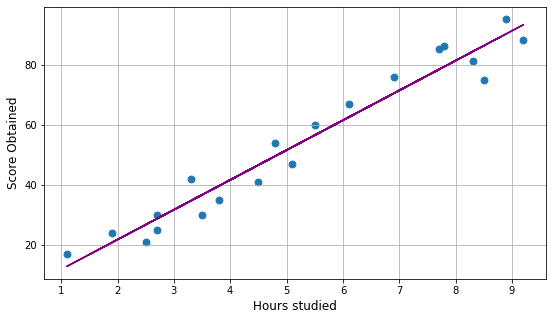

In [12]:
# Plotting the regression line
line = reg.coef_*X+reg.intercept_

# scatter plot for the training dataset
plt.figure(figsize=(9, 5))
plt.scatter(X_train, y_train,s=47)
plt.plot(X, line, color='purple',);
plt.xlabel("Hours studied", fontsize=12)
plt.ylabel("Score Obtained", fontsize=12)
plt.grid()
plt.show()

In [13]:
# checking the accuracy of training dataset

print("Accuracy of Training set : ",round(reg.score(X_train,y_train)*100,2),"%")

Accuracy of Training set :  95.16 %


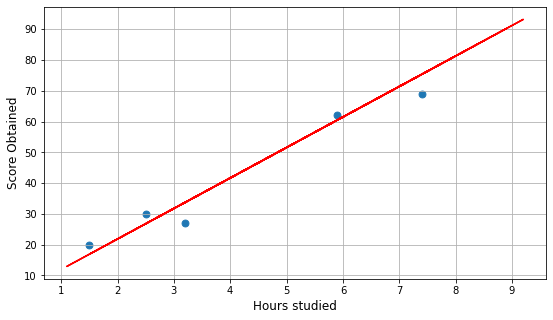

In [14]:
 # regression line and scatter plot for the testing dataset
plt.figure(figsize=(9, 5))
plt.scatter(X_test, y_test,s=47)
plt.plot(X, line, color='red');
plt.xlabel("Hours studied", fontsize=12)
plt.ylabel("Score Obtained", fontsize=12)
plt.grid()
plt.show()

In [15]:
print("Accuracy of Testing Dataset : ",round(reg.score(X_test,y_test)*100,2),"%")

Accuracy of Testing Dataset :  94.55 %


### Making Predictions

In [16]:
print("Hours studied: \n",X_test) # Testing data - Hours studied
y_pred = reg.predict(X_test) # Predicting the score Obtained 

Hours studied: 
 [[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [17]:
# Comparing Actual scores  vs Predicted scores
student_score_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
student_score_compare

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [18]:
# goodness of the fit test
from sklearn import metrics
print("accuracy of actual and predicted r-squared : ", metrics.r2_score(y_test,y_pred))


accuracy of actual and predicted r-squared :  0.9454906892105356


#### As the accuracy is quite nearer to 1.0 which indicates it is a good model

### Evaluating Model

In [19]:
# evaluating predictions on regression machine learning model

from sklearn.metrics import mean_squared_error,mean_absolute_error
MSE=metrics.mean_squared_error(y_test,y_pred)
RMSE=np.sqrt(MSE)
MABE=metrics.mean_absolute_error(y_test,y_pred)

print("Mean Squared Error      : ",MSE)
print("Root Mean Squared Error : ",RMSE)
print("Mean Absolute Error     : ",MABE)

Mean Squared Error      :  21.5987693072174
Root Mean Squared Error :  4.6474476121003665
Mean Absolute Error     :  4.183859899002975


#### Lower the Value of Mean Squared Error, Root Mean Squared Error and Mean Absolute Error Better is The performance of the Model

In [20]:
# calculating Scatter Index
SI=(RMSE/student_data['Scores'].mean())*100
print("Scatter Index : ",round(SI,2),"%")

Scatter Index :  9.03 %


##### Scatter Index is less than 10% which indicates It is a Good Model


##### hence we can say that the regression model predicts score much accurately.

### predict: What will be predicted score if a student studies for 9.25 hrs/ day?

In [21]:
hours=[9.25]
prediction=reg.predict([hours])
print("Predicted Score for the student who studies for 9.25 hrs/day is {} marks".format(round(prediction[0],2)))

Predicted Score for the student who studies for 9.25 hrs/day is 93.69 marks


### Conclusion:   
#### 1) Predicted Score for the student who studies for 9.25 hrs/day is 93.69.                                                       

#### 2) R^2 Regression score for the linear regression model is 0.95                                                                 

#### 3) Scatter Index is 9.03 % which indicates accuracy of the model to predict the score is good.

                    
              

# Thank You !